
**Duration-of-Credit-Month** refers to the length of time (in months) over which the loan or credit is expected to be repaid. This is a common metric in banking and finance that specifies the total duration of the loan agreement, indicating how long the customer has to repay the loan in full.

**Instalment-per-cent**: This value is a percentage that represents the proportion of the borrower's income that will go toward repaying the loan each month. For instance, if a customer earns $1,000 per month and the loan instalment is $200, the "Instalment-per-cent" would be 20%.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.style as style
import seaborn as sns

import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_excel(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Machine learning\Creditworthiness\train_credit-data.xlsx")

In [3]:
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,NaN,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,NaN,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,NaN,1-4 yrs,2,NaN,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,NaN,1-4 yrs,1,NaN,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,NaN,< 1yr,4,NaN,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               202 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         43 non-null     object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

In [5]:
df.isnull().sum()/len(df)*100

Credit-Application-Result             0.0
Account-Balance                       0.0
Duration-of-Credit-Month              0.0
Payment-Status-of-Previous-Credit     0.0
Purpose                               0.0
Credit-Amount                         0.0
Value-Savings-Stocks                 59.6
Length-of-current-employment          0.0
Instalment-per-cent                   0.0
Guarantors                           91.4
Duration-in-Current-address          68.8
Most-valuable-available-asset         0.0
Age-years                             2.4
Concurrent-Credits                    0.0
Type-of-apartment                     0.0
No-of-Credits-at-this-Bank            0.0
Occupation                            0.0
No-of-dependents                      0.0
Telephone                             0.0
Foreign-Worker                        0.0
dtype: float64

*Comment: Missing values in the columns of: Value-Savings-Stocks, Guarantors, Duration-in-Current-address, Age-years.Age years can be interpolated, but the rest has too high amount of missing data, therefore to be dropped.*
*Also to be noted - several feature encoding will be needed.*

In [6]:
df.columns

Index(['Credit-Application-Result', 'Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Purpose', 'Credit-Amount', 'Value-Savings-Stocks',
       'Length-of-current-employment', 'Instalment-per-cent', 'Guarantors',
       'Duration-in-Current-address', 'Most-valuable-available-asset',
       'Age-years', 'Concurrent-Credits', 'Type-of-apartment',
       'No-of-Credits-at-this-Bank', 'Occupation', 'No-of-dependents',
       'Telephone', 'Foreign-Worker'],
      dtype='object')

In [7]:
df = df.drop(['Value-Savings-Stocks', 'Guarantors', 'Duration-in-Current-address'], axis=1)

### EDA

#### Target variable

In [8]:
def setup_plot():
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    plt.xticks(rotation=40)
    plt.gcf().set_size_inches(5, 3)  

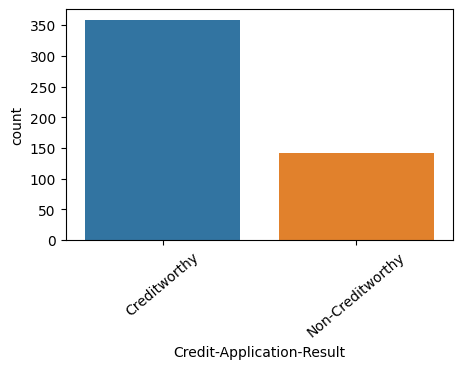

In [9]:
sns.countplot(df, x=df['Credit-Application-Result'])
setup_plot()

*Comment: The dataset is imbalanced.*

*I decided that I am not going to use SMOTE or RandomUnderSampler because it can easily lead to overfitting, noise introduction or inappropriate Balancing, so rather will use differenet metrics.*

#### Numerical variables

In [10]:
num = df.select_dtypes(include=np.number).columns
num

Index(['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'Occupation', 'No-of-dependents', 'Telephone', 'Foreign-Worker'],
      dtype='object')

*Comment: Credit-Amount to be checked separately.*

In [11]:
num = num.drop('Credit-Amount')

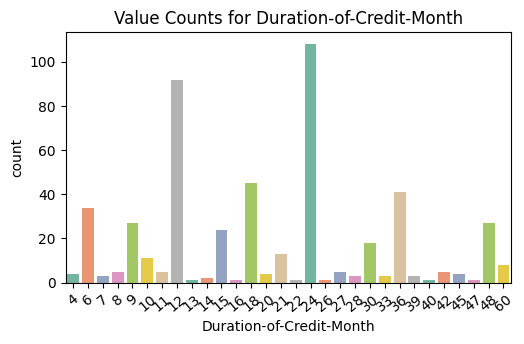

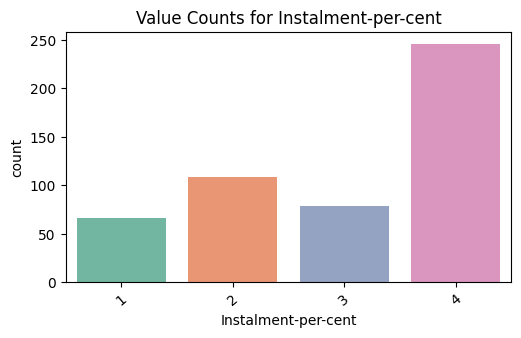

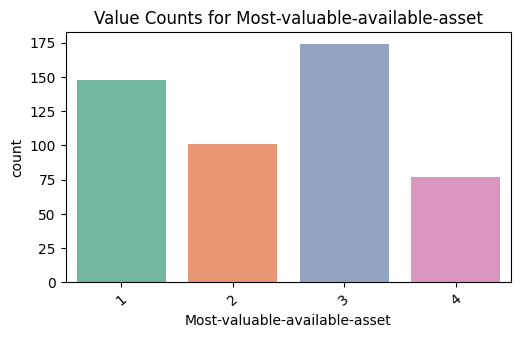

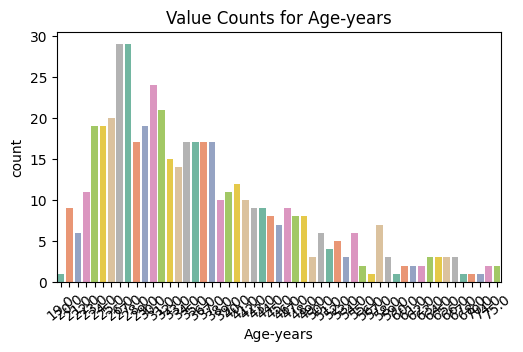

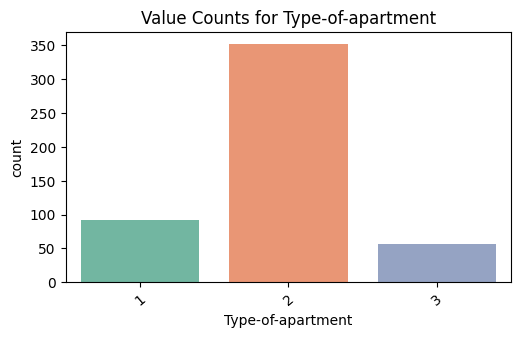

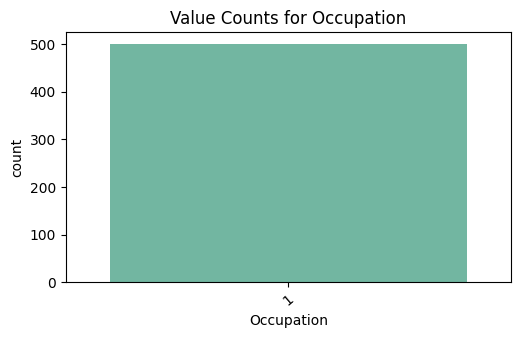

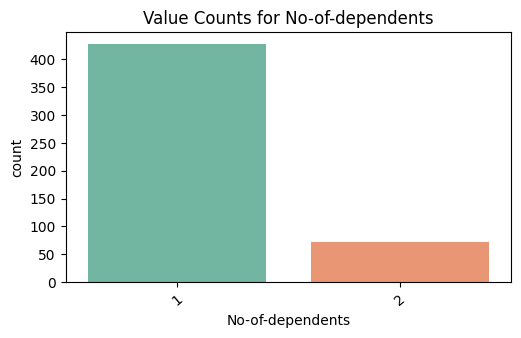

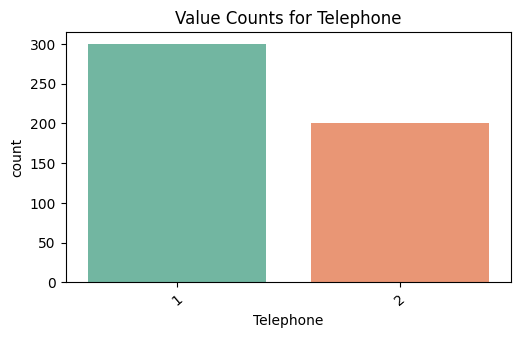

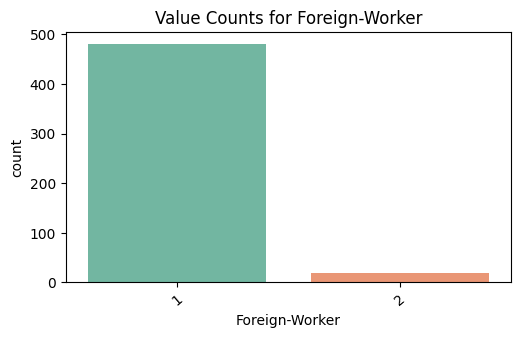

In [12]:
for col in num:
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Value Counts for {col}')
    plt.tight_layout(pad=0.5)
    setup_plot()
    plt.show()

*Comment: Age to be checked separately, Occupation and Phone number can be dropped.*

In [13]:
df = df.drop(['Occupation', 'Telephone'], axis=1)

*Note: The most popular repayment period is 12 and 24 months, however there are some which are for 6,9,15,18,36,48 are quite common as well.*
*The rest of the features are rather categorical value, not numerical.*

*To be encoded: 'Instalment-per-cent', 'Most-valuable-available-asset','Type-of-apartment', 'No-of-dependents', 'Foreign-Worker'.*

##### Credit Amount

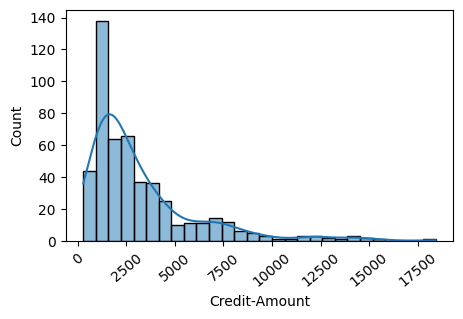

In [14]:
sns.histplot(data= df, x=df['Credit-Amount'], kde=True)
setup_plot()

*Comment: Based on the amount and the duration, these loans are mainly short term loans - majority as of less than 2 years with low credit amount - majority less than 5000.*

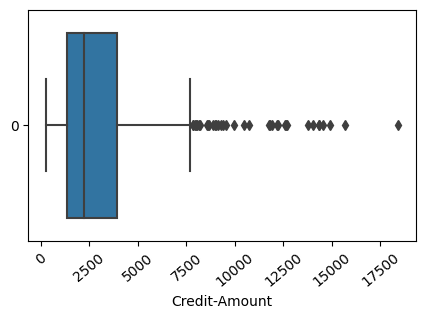

In [15]:
sns.boxplot(data= df, x=df['Credit-Amount'])
setup_plot()

*Comment: There are some outliers, but considering the amount of obersation points(500 rows), might not be worth to dropped.*

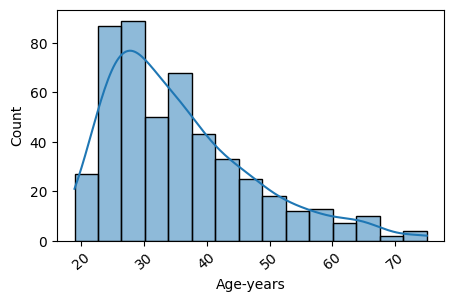

In [16]:
sns.histplot(data=df, x=df['Age-years'], kde=True)
setup_plot()

*Comment: This type of loan is popular among mainly peoople in their thirties and forties.*

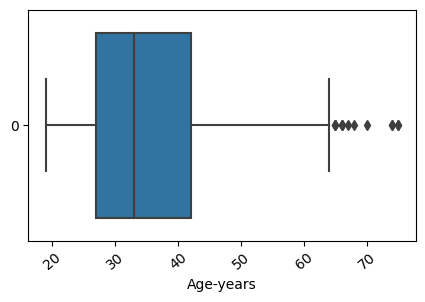

In [17]:
sns.boxplot(data=df, x=df['Age-years'])
setup_plot()

*Comment: same as for Credit Amount.*

#### Object variables

In [18]:
obj = df.select_dtypes(include='object').columns
obj

Index(['Credit-Application-Result', 'Account-Balance',
       'Payment-Status-of-Previous-Credit', 'Purpose',
       'Length-of-current-employment', 'Concurrent-Credits',
       'No-of-Credits-at-this-Bank'],
      dtype='object')

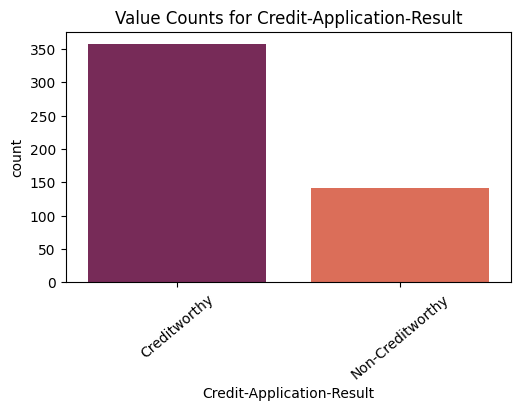

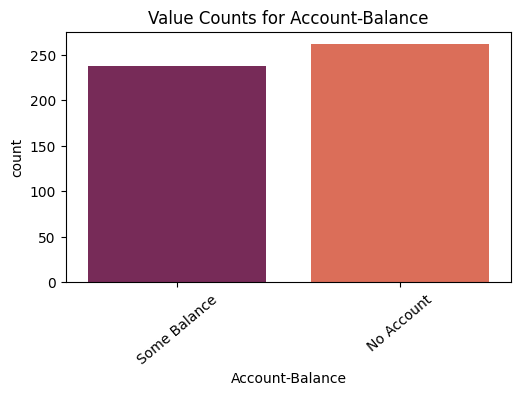

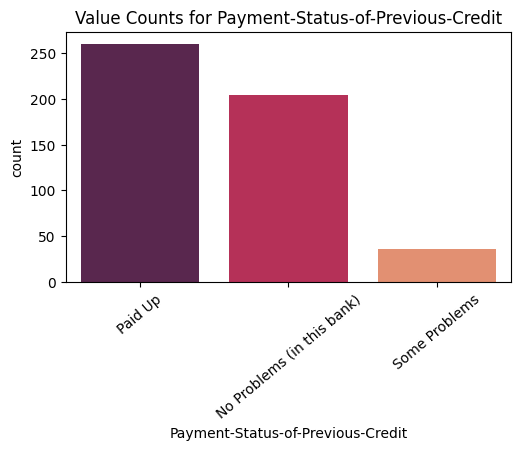

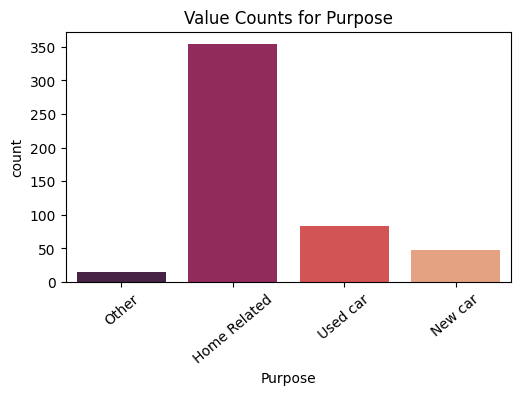

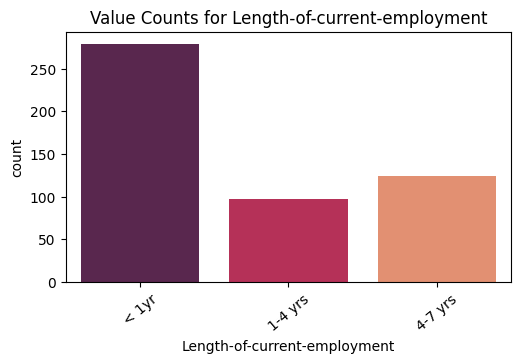

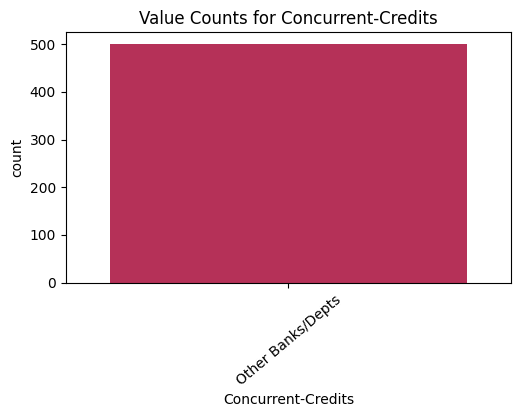

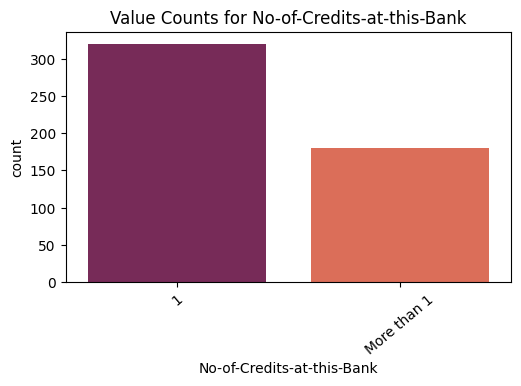

In [19]:
for col in obj:
    sns.countplot(data=df, x=col, palette="rocket")
    plt.title(f'Value Counts for {col}')
    plt.tight_layout(pad=0.5)
    setup_plot()
    plt.show()

*Comment: Concurrent credit can be dropped.*

In [20]:
df.columns

Index(['Credit-Application-Result', 'Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Purpose', 'Credit-Amount', 'Length-of-current-employment',
       'Instalment-per-cent', 'Most-valuable-available-asset', 'Age-years',
       'Concurrent-Credits', 'Type-of-apartment', 'No-of-Credits-at-this-Bank',
       'No-of-dependents', 'Foreign-Worker'],
      dtype='object')

In [21]:
df = df.drop('Concurrent-Credits', axis=1)

#### Encoding

*In some cases the order hierarchy matters and in other features - it does not have relevancy, therefore I will execute two types of encoding: dummy encoding where I dont have knowledge if the order hierarchy matters I decided to use simply manual method to ensure that the hierarchy is assigned properly.*


*Instead of label encoding since the assignment of numeric values to categorical labels is done automatically based on the alphabetical or lexicographical order of the categories.*

In [22]:
dum = ['Purpose', 'No-of-Credits-at-this-Bank']

In [23]:
df = pd.get_dummies(df, columns=['Purpose', 'No-of-Credits-at-this-Bank'],drop_first = True)

In [24]:
df['Purpose_New car'] = df['Purpose_New car'].astype(int)
df['Purpose_Other'] = df['Purpose_Other'].astype(int)
df['Purpose_Used car'] = df['Purpose_Used car'].astype(int)
df['No-of-Credits-at-this-Bank_More than 1'] = df['No-of-Credits-at-this-Bank_More than 1'].astype(int)

In [25]:
df['Account-Balance'].value_counts()

Account-Balance
No Account      262
Some Balance    238
Name: count, dtype: int64

In [26]:
account_mapping = {'No Account': 0, 'Some Balance': 1, 'Paid Up': 2}
df['Account-Balance'] = df['Account-Balance'].map(account_mapping)

In [27]:
df['Payment-Status-of-Previous-Credit'].value_counts()

Payment-Status-of-Previous-Credit
Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: count, dtype: int64

In [28]:
payment_mapping = {'Some Problems': 0, 'No Problems (in this bank)': 1, 'Paid Up': 2}
df['Payment-Status-of-Previous-Credit'] = df['Payment-Status-of-Previous-Credit'].map(payment_mapping)

In [29]:
df['Length-of-current-employment'].value_counts()

Length-of-current-employment
< 1yr      279
4-7 yrs    124
1-4 yrs     97
Name: count, dtype: int64

In [30]:
length_mapping = {'< 1yr': 0, '1-4 yrs': 1, '4-7 yrs': 2}
df['Length-of-current-employment'] = df['Length-of-current-employment'].map(length_mapping)

In [31]:
df['Credit-Application-Result'].value_counts()

Credit-Application-Result
Creditworthy        358
Non-Creditworthy    142
Name: count, dtype: int64

In [32]:
result_mapping = {'Non-Creditworthy': 0, 'Creditworthy': 1}
df['Credit-Application-Result'] = df['Credit-Application-Result'].map(result_mapping)

In [33]:
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Credit-Amount,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-dependents,Foreign-Worker,Purpose_New car,Purpose_Other,Purpose_Used car,No-of-Credits-at-this-Bank_More than 1
0,1,1,4,2,1494,0,1,1,NaN,2,2,2,0,1,0,0
1,1,1,4,2,1494,0,1,1,29.0,2,2,2,0,0,0,0
2,1,1,4,1,1544,1,2,1,42.0,2,2,1,0,0,0,1
3,1,1,4,1,3380,1,1,1,37.0,2,2,1,0,0,0,0
4,1,0,6,2,343,0,4,1,27.0,2,1,1,0,0,0,0


*Comment: Data needs to be scaled.*

#### Missin values

In [34]:
df['Age-years'].describe()

count    488.000000
mean      35.637295
std       11.501522
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: Age-years, dtype: float64

In [35]:
median_age = df['Age-years'].median()

In [36]:
df['Age-years'].fillna(median_age, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Credit-Application-Result               500 non-null    int64  
 1   Account-Balance                         500 non-null    int64  
 2   Duration-of-Credit-Month                500 non-null    int64  
 3   Payment-Status-of-Previous-Credit       500 non-null    int64  
 4   Credit-Amount                           500 non-null    int64  
 5   Length-of-current-employment            500 non-null    int64  
 6   Instalment-per-cent                     500 non-null    int64  
 7   Most-valuable-available-asset           500 non-null    int64  
 8   Age-years                               500 non-null    float64
 9   Type-of-apartment                       500 non-null    int64  
 10  No-of-dependents                        500 non-null    int64 

In [38]:
df.describe()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Credit-Amount,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-dependents,Foreign-Worker,Purpose_New car,Purpose_Other,Purpose_Used car,No-of-Credits-at-this-Bank_More than 1
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.716000,0.476000,21.43400,1.448000,3199.980000,0.690000,3.010000,2.360000,35.574000,1.928000,1.14600,1.038000,0.094000,0.030000,0.166000,0.360000
std,0.451388,0.499924,12.30742,0.626163,2831.386861,0.843399,1.113724,1.064268,11.369567,0.539814,0.35346,0.191388,0.292121,0.170758,0.372453,0.480481
min,0.000000,0.000000,4.00000,0.000000,276.000000,0.000000,1.000000,1.000000,19.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.00000,1.000000,1357.250000,0.000000,2.000000,1.000000,27.000000,2.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,18.00000,2.000000,2236.500000,0.000000,3.000000,3.000000,33.000000,2.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,24.00000,2.000000,3941.500000,1.000000,4.000000,3.000000,41.000000,2.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,60.00000,2.000000,18424.000000,2.000000,4.000000,4.000000,75.000000,3.000000,2.00000,2.000000,1.000000,1.000000,1.000000,1.000000


### Data modelling

In [39]:
X = df.drop('Credit-Application-Result', axis=1)
y = df['Credit-Application-Result']

#### Splitting - stratify due to imbalanced

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,random_state = 0)

*Note: Will check the accuracy to understand how well the model generalize, however the final metric will be ROC-AUC since the dataset is imbalanced.*

##### Decision Tree

In [430]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree_ypred = dtree.predict(X_test)
print('train accuracy: {:.2f}'.format(dtree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(dtree.score(X_test,y_test)))

train accuracy: 1.00
test accuracy: 0.66


*Hyperparameter Tuning*

In [431]:
dtree = dtree = DecisionTreeClassifier(random_state=42)

In [432]:
param_grid = {
    'max_features': [3,5,7,10],
    'max_leaf_nodes':[3,5,7,10]
}

In [433]:
grid_dtree = GridSearchCV(dtree, param_grid = param_grid, cv=5)
grid_dtree.fit(X_train,y_train)

print('Best cross-validation acuracy: {:.2f}'.format(grid_dtree.best_score_))
print('Best test score: {:.2f}'.format(grid_dtree.score(X_test,y_test)))
print('Best parameters:',grid_dtree.best_params_)

Best cross-validation acuracy: 0.76
Best test score: 0.79
Best parameters: {'max_features': 10, 'max_leaf_nodes': 5}


In [79]:
dtree = DecisionTreeClassifier(max_features=7,max_leaf_nodes=5,random_state=42)

dtree.fit(X_train,y_train)
dtree_ypred = dtree.predict(X_test)

print('train accuracy: {:.2f}'.format(dtree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(dtree.score(X_test,y_test)))

train accuracy: 0.77
test accuracy: 0.77


##### Logistic Regression

In [435]:
lreg = LogisticRegression(random_state=42)
lreg.fit(X_train, y_train)
lreg_ypred = lreg.predict(X_test)
print('train accuracy: {:.2f}'.format(lreg.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(lreg.score(X_test,y_test)))

train accuracy: 0.75
test accuracy: 0.78


In [436]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [437]:
grid_lreg = GridSearchCV(lreg, param_grid, cv=5)
grid_lreg .fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_lreg.best_score_))
print('Best test score: {:.2f}'.format(grid_lreg.score(X_test,y_test)))
print('Best parameters:',grid_lreg.best_params_)

Best cross-validation acuracy: 0.74
Best test score: 0.74
Best parameters: {'C': 0.1}


In [438]:
lreg = LogisticRegression(C=1, random_state=42)
lreg.fit(X_train, y_train)
lreg_ypred = lreg.predict(X_test)
print('train accuracy: {:.2f}'.format(lreg.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(lreg.score(X_test,y_test)))

train accuracy: 0.75
test accuracy: 0.78


Tuning 2.0 Logistic Regression

In [53]:
pipeline_lreg = Pipeline([
    ('scaler', RobustScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

In [57]:
param_grid_lreg = {
    'logreg__max_iter': [100, 200, 500, 1000], 
    'logreg__penalty': ['l1', 'l2'],              
    'logreg__solver': ['liblinear', 'saga']       
}

In [58]:
grid_search_lreg = GridSearchCV(pipeline_lreg, param_grid_lreg, cv=5, scoring='accuracy')

In [59]:
grid_search_lreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('logreg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logreg__max_iter': [100, 200, 500, 1000],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [60]:
print('Best parameters:', grid_search_lreg.best_params_)

Best parameters: {'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}


In [63]:
lreg_ypred = grid_search_lreg.predict(X_test)

In [64]:
print('Train accuracy: {:.2f}'.format(grid_search_lreg.score(X_train, y_train)))
print('Test accuracy: {:.2f}'.format(grid_search_lreg.score(X_test, y_test)))

Train accuracy: 0.76
Test accuracy: 0.74


In [66]:
lreg02 = LogisticRegression(C=1, max_iter=100, penalty='l1', solver='liblinear', random_state=42)
lreg02.fit(X_train, y_train)
lreg_ypred02 = lreg02.predict(X_test)
print('train accuracy: {:.2f}'.format(lreg02.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(lreg02.score(X_test,y_test)))

train accuracy: 0.77
test accuracy: 0.75


##### SVC

In [439]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_model_ypred = SVC_model.predict(X_test)
print('train accuracy: {:.2f}'.format(SVC_model.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(SVC_model.score(X_test,y_test)))

train accuracy: 0.73
test accuracy: 0.73


In [440]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('svc', SVC())
])

param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

SVC_grid = GridSearchCV(pipeline, param_grid, cv=5)
SVC_grid = SVC_grid.fit(X_train,y_train)

print('train score: {:.2f}'.format(SVC_grid.score(X_train,y_train)))
print('test score: {:.2f}'.format(SVC_grid.score(X_test,y_test)))
print('Best parameters:',SVC_grid.best_params_)

train score: 0.78
test score: 0.74
Best parameters: {'svc__C': 100, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [80]:
SVC_model = SVC(probability=True,C=1, gamma='scale', kernel='linear') # probabilty is needed for ROC-AUC
SVC_model.fit(X_train, y_train)
SVC_model_ypred = SVC_model.predict(X_test)
print('train accuracy: {:.2f}'.format(SVC_model.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(SVC_model.score(X_test,y_test)))

train accuracy: 0.77
test accuracy: 0.74


##### Random Forest

In [442]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))

train score: 1.00
test score: 0.76


In [443]:
rfc = RandomForestClassifier(random_state = 42)

param_grid = {
    'max_features': [3,5,7,10],
    'max_leaf_nodes':[3,5,7,10]
}

grid_rfc = GridSearchCV(rfc, param_grid = param_grid,cv =5)
grid_rfc.fit(X_train,y_train)

print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)


Best cross-validation acuracy: 0.76
Best test score: 0.77
Best parameters: {'max_features': 5, 'max_leaf_nodes': 10}


In [494]:
rfc = RandomForestClassifier(max_features=10,max_leaf_nodes=5,random_state = 42)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))
rfc_ypred = rfc.predict(X_test)

train score: 0.79
test score: 0.78


*Note: As expected RandomForest generalizes the best among these models, Logistic regression also has similar result, but decided to further tune the random forest and combine them with stacking method.*

Tuning 2.0 Random Forest

In [510]:
param_grid02 = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [511]:
grid_rfc02 = GridSearchCV(rfc, param_grid = param_grid02,cv =5)
grid_rfc02.fit(X_train,y_train)

print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc02.best_score_))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc02.best_params_)

Best cross-validation acuracy: 0.75
Best test score: 0.77
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [44]:
rfc02 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=4, min_samples_split=2, max_features=10,max_leaf_nodes=5,random_state=42)
rfc02.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc02.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc02.score(X_test,y_test)))
rfc_ypred02 = rfc02.predict(X_test)

train score: 0.79
test score: 0.78


*No model improvement due to further hyperparameter tuning.*

Stacking

In [68]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=4, min_samples_split=2, max_features=10,max_leaf_nodes=5,random_state=42)),
    ('lr', LogisticRegression(C=1, max_iter=100, penalty='l1', solver='liblinear', random_state=42))
]

In [69]:
meta_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=4, min_samples_split=2, max_features=10,max_leaf_nodes=5,random_state=42)

In [70]:
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  
)

In [71]:
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_features=10,
                                                       max_leaf_nodes=5,
                                                       min_samples_leaf=4,
                                                       random_state=42)),
                               ('lr',
                                LogisticRegression(C=1, penalty='l1',
                                                   random_state=42,
                                                   solver='liblinear'))],
                   final_estimator=RandomForestClassifier(max_features=10,
                                                          max_leaf_nodes=5,
                                                          min_samples_leaf=4,
                                                          random_state=42))

In [74]:
y_pred_stack = stacking_model.predict(X_test)

In [75]:
print('Stacking Model Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_stack)))

Stacking Model Accuracy: 0.79


In [445]:
rfc.feature_importances_

array([0.34401025, 0.1906608 , 0.09497905, 0.16089107, 0.01589271,
       0.02040386, 0.08209479, 0.05812171, 0.01663364, 0.01238853,
       0.        , 0.00325805, 0.        , 0.        , 0.00066554])

In [446]:
Feature_importance = pd.DataFrame({'Features':X_train.columns,'Importance':rfc.feature_importances_})

In [447]:
Feature_importance = Feature_importance.sort_values(by = 'Importance',ascending = False)

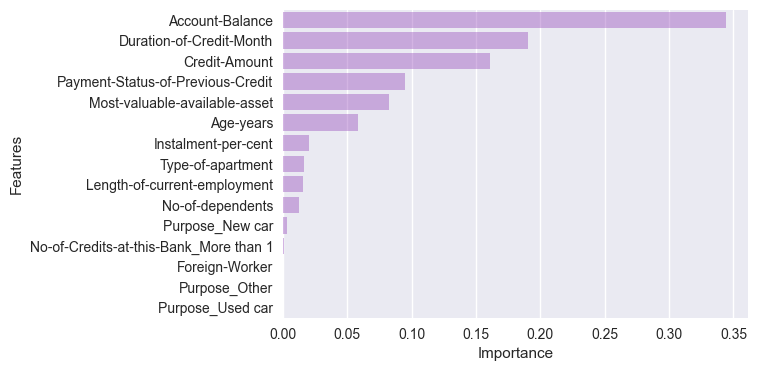

In [448]:
plt.figure(figsize=(6,4))
sns.barplot(x='Importance',y='Features',data = Feature_importance, color = 'darkorchid',alpha = 0.4)
plt.show()

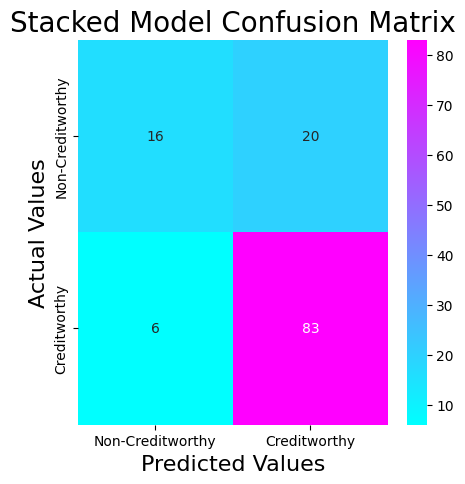

In [77]:
confusion = confusion_matrix(y_test, y_pred_stack )
plt.figure(figsize=(5,5))

sns.heatmap(confusion, annot=True, fmt='d', cmap='cool', 
            xticklabels=['Non-Creditworthy', 'Creditworthy'], 
            yticklabels=['Non-Creditworthy', 'Creditworthy'])

plt.title('Stacked Model Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Values', fontsize=16)
plt.ylabel('Actual Values', fontsize=16)

plt.show()

### Final metric: ROC-AUC

In [81]:
pred_prob_dct = dtree.predict_proba(X_test)
pred_prob_lgr = lreg02.predict_proba(X_test)
pred_prob_svc = SVC_model.predict_proba(X_test)
pred_prob_rfc = rfc02.predict_proba(X_test)
pred_prob_stack = stacking_model.predict_proba(X_test)


fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_dct[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_lgr[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_svc[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_rfc[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_rfc[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

<Figure size 1000x600 with 0 Axes>

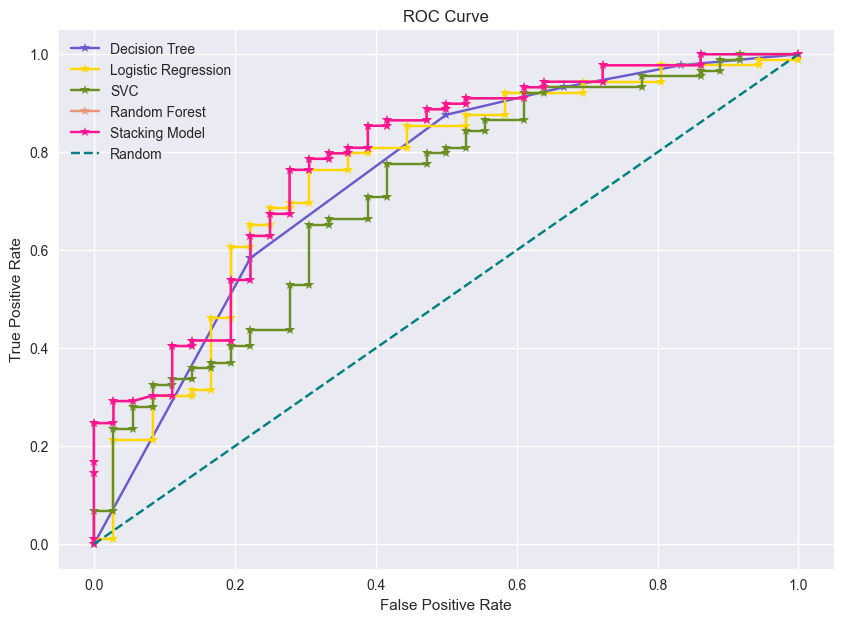

In [83]:
plt.style.use('seaborn')
plt.figure(figsize=(10,6))

plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, marker='*', color='slateblue', label='Decision Tree')
plt.plot(fpr2, tpr2, marker='*', color='gold', label='Logistic Regression')
plt.plot(fpr3, tpr3, marker='*', color='olivedrab',  label='SVC')
plt.plot(fpr4, tpr4, marker='*', color='darksalmon', label='Random Forest')
plt.plot(fpr5, tpr5, marker='*', color='deeppink', label='Stacking Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='teal', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [84]:
fpr1, tpr1, _ = roc_curve(y_test, pred_prob_dct[:, 1], pos_label=1)
fpr2, tpr2, _ = roc_curve(y_test, pred_prob_lgr[:, 1], pos_label=1)
fpr3, tpr3, _ = roc_curve(y_test, pred_prob_svc[:, 1], pos_label=1)
fpr4, tpr4, _ = roc_curve(y_test, pred_prob_rfc[:, 1], pos_label=1)
fpr4, tpr4, _ = roc_curve(y_test, pred_prob_stack[:, 1], pos_label=1)

auc_dct = auc(fpr1, tpr1)
auc_lgr = auc(fpr2, tpr2)
auc_svc = auc(fpr3, tpr3)
auc_rfc = auc(fpr4, tpr4)
auc_stack = auc(fpr5, tpr5)

print('AUC score for Decision Tree: {:.2f}'.format(auc_dct))
print('AUC score for Logistic Regression: {:.2f}'.format(auc_lgr))
print('AUC score for SVC: {:.2f}'.format(auc_svc))
print('AUC score for Random Forest: {:.2f}'.format(auc_rfc))
print('AUC score for stack Model: {:.2f}'.format(auc_stack))

AUC score for Decision Tree: 0.74
AUC score for Logistic Regression: 0.75
AUC score for SVC: 0.71
AUC score for Random Forest: 0.75
AUC score for stack Model: 0.78


### Model Application

In [148]:
test = pd.read_excel(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Machine learning\Creditworthiness\test_customers.xlsx")

In [149]:
test.head(5)

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,NaN,< 1yr,2,NaN,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,NaN,< 1yr,3,NaN,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,NaN,4,4,23,Other Banks/Depts,1,1,1,1,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,NaN,< 1yr,2,NaN,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
4,No Account,6,No Problems (in this bank),Home Related,1957,NaN,1-4 yrs,1,NaN,4,3,31,Other Banks/Depts,2,1,1,1,1,1


In [150]:
len(test)

500

In [151]:
test.isnull().sum()

Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                 300
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                           451
Duration-in-Current-address            0
Most-valuable-available-asset          0
Age-years                              0
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

In [152]:
test.drop(['Value-Savings-Stocks',
            'Guarantors',
            'Duration-in-Current-address',
            'Concurrent-Credits',
            'Occupation',
            'Telephone'],
           axis = 1,inplace = True)

In [153]:
test['Account-Balance'].value_counts()

Account-Balance
No Account      282
Some Balance    218
Name: count, dtype: int64

In [154]:
test_account_mapping = {'No Account': 0, 'Some Balance': 1}
test['Account-Balance'] = test['Account-Balance'].map(test_account_mapping)

In [155]:
test['Payment-Status-of-Previous-Credit'].value_counts()

Payment-Status-of-Previous-Credit
Paid Up                       272
No Problems (in this bank)    176
Some Problems                  52
Name: count, dtype: int64

In [156]:
test_payment_mapping = {'Some Problems': 0, 'No Problems (in this bank)': 1, 'Paid Up': 2}
test['Payment-Status-of-Previous-Credit'] = test['Payment-Status-of-Previous-Credit'].map(test_payment_mapping)

In [157]:
test['Length-of-current-employment'].value_counts()

Length-of-current-employment
< 1yr      291
4-7 yrs    131
1-4 yrs     78
Name: count, dtype: int64

In [158]:
test_length_mapping = {'< 1yr': 0, '1-4 yrs': 1, '4-7 yrs': 2}
test['Length-of-current-employment'] = test['Length-of-current-employment'].map(test_length_mapping)

In [159]:
dum = ['Purpose', 'No-of-Credits-at-this-Bank']
test = pd.get_dummies(test, columns=['Purpose', 'No-of-Credits-at-this-Bank'],drop_first = True)

In [160]:
test['Purpose_New car'] = test['Purpose_New car'].astype(int)
test['Purpose_Used car'] = test['Purpose_Used car'].astype(int)
test['No-of-Credits-at-this-Bank_More than 1'] = test['No-of-Credits-at-this-Bank_More than 1'].astype(int)

In [161]:
test.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Credit-Amount,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-dependents,Foreign-Worker,Purpose_New car,Purpose_Used car,No-of-Credits-at-this-Bank_More than 1
0,0,9,1,2799,0,2,1,36,1,2,1,0,0,1
1,0,12,1,2122,0,3,1,39,1,2,2,0,0,1
2,0,24,2,3758,0,1,4,23,1,1,1,0,0,0
3,0,11,1,3905,0,2,1,36,1,2,1,0,0,1
4,0,6,1,1957,1,1,3,31,2,1,1,0,0,0


In [162]:
df.columns

Index(['Credit-Application-Result', 'Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Credit-Amount', 'Length-of-current-employment', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'No-of-dependents', 'Foreign-Worker', 'Purpose_New car',
       'Purpose_Other', 'Purpose_Used car',
       'No-of-Credits-at-this-Bank_More than 1'],
      dtype='object')

In [163]:
test.columns

Index(['Account-Balance', 'Duration-of-Credit-Month',
       'Payment-Status-of-Previous-Credit', 'Credit-Amount',
       'Length-of-current-employment', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'No-of-dependents', 'Foreign-Worker', 'Purpose_New car',
       'Purpose_Used car', 'No-of-Credits-at-this-Bank_More than 1'],
      dtype='object')

In [164]:
X_train.columns

Index(['Account-Balance', 'Duration-of-Credit-Month',
       'Payment-Status-of-Previous-Credit', 'Credit-Amount',
       'Length-of-current-employment', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'No-of-dependents', 'Foreign-Worker', 'Purpose_New car',
       'Purpose_Used car', 'No-of-Credits-at-this-Bank_More than 1'],
      dtype='object')

*Comment: Since there is one feature difference ('Purpose_Other'), therefore first will drop this from the X_train and apply the best model on X_test.*

In [165]:
X = df.drop(['Credit-Application-Result','Purpose_Other'], axis=1)
y = df['Credit-Application-Result']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,random_state = 0)

In [166]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=4, min_samples_split=2, max_features=10,max_leaf_nodes=5,random_state=42)),
    ('lr', LogisticRegression(C=1, max_iter=100, penalty='l1', solver='liblinear', random_state=42))
]

meta_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=4, min_samples_split=2, max_features=10,max_leaf_nodes=5,random_state=42)

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  
)

stacking_model.fit(X_train, y_train)

y_pred_stack = stacking_model.predict(X_test)
print('Stacking Model Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_stack)))

Stacking Model Accuracy: 0.78


In [167]:
y_pred_final = stacking_model.predict(test)

In [168]:
y_pred_final 

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,

In [169]:
test['Predicted_Creditworthiness'] = y_pred_final

In [170]:
encoded = {'Predicted_Creditworthiness': {0: 'Non-Creditworthy', 1: 'Creditworthy', }}
test = test.replace(encoded)

In [171]:
test.columns

Index(['Account-Balance', 'Duration-of-Credit-Month',
       'Payment-Status-of-Previous-Credit', 'Credit-Amount',
       'Length-of-current-employment', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'No-of-dependents', 'Foreign-Worker', 'Purpose_New car',
       'Purpose_Used car', 'No-of-Credits-at-this-Bank_More than 1',
       'Predicted_Creditworthiness'],
      dtype='object')

In [172]:
new_column_order = [
    'Predicted_Creditworthiness', 
    'Account-Balance',
    'Duration-of-Credit-Month',
    'Payment-Status-of-Previous-Credit',
    'Credit-Amount',
    'Length-of-current-employment',
    'Instalment-per-cent',
    'Most-valuable-available-asset',
    'Age-years',
    'Type-of-apartment',
    'No-of-dependents',
    'Foreign-Worker',
    'Purpose_New car',
    'Purpose_Used car',
    'No-of-Credits-at-this-Bank_More than 1'
]

In [173]:
test = test[new_column_order]

In [174]:
test.head()

,Predicted_Creditworthiness,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Credit-Amount,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-dependents,Foreign-Worker,Purpose_New car,Purpose_Used car,No-of-Credits-at-this-Bank_More than 1
0,Creditworthy,0,9,1,2799,0,2,1,36,1,2,1,0,0,1
1,Creditworthy,0,12,1,2122,0,3,1,39,1,2,2,0,0,1
2,Non-Creditworthy,0,24,2,3758,0,1,4,23,1,1,1,0,0,0
3,Creditworthy,0,11,1,3905,0,2,1,36,1,2,1,0,0,1
4,Creditworthy,0,6,1,1957,1,1,3,31,2,1,1,0,0,0


In [176]:
test.to_csv('test_with_predictions.csv', index=False)